<a href="https://colab.research.google.com/github/lexyhen/LABS/blob/main/ProteinFolding_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({'font.size': 18})

## Multiplicity
For a protein folding due to hairpins, we use the binomial formula to determine the number of ways (multiplicity) to have hairpin bends of the amino acid chain.

$$\Omega\left(N,n\right) = \frac{N!}{n!\left(N-n\right)!}$$

where $\Omega$ is the number of configurations for $N$ possible bend points and $n$ bends. For example a peptide with a single bend point can bend or not bend at that point. We expect one way to not bend and one way to bend.

$$\Omega\left(1,0\right) =\frac{1!}{0!\left(1-0\right)!} = 1 ~{\rm no ~bend}$$

$$\Omega\left(1,1\right) =\frac{1!}{1!\left(1-1\right)!} = 1 ~{\rm one ~bend}$$

A visual diagram of these can be seen in (b) of the figure below.

<img src="https://raw.githubusercontent.com/troymessina/biophysics/main/hairpins/hairpins.png" alt="peptide folding model" width="700">

Let's use Python to calculate the multiplicity of the two fold points of (c) in the figure above. In the code cell below, calculate $\Omega(2, 0), \Omega(2, 1),$ and $\Omega(2, 2)$. Do these individually by explicitly calculating the binomial formula using the `factorial()` function. 

In [3]:
TestOmega = (factorial(0))/factorial(0)*factorial(1-0)

Omega20 = (factorial(2))/(factorial(0)*factorial(2-0))
Omega21 = (factorial(2))/(factorial(1)*factorial(2-1))
Omega22 = (factorial(2))/(factorial(2)*factorial(2-2))



print(Omega20,Omega21,Omega22)

1.0 2.0 1.0


### Using Arrays
Next, define arrays to calculate the same thing.

* `N = 2`
* `n = np.arange(0, N+1, 1) #an array from 0 to N`
* `Omega = factorial(N)/(factorial(n)*factorial(N-n)`

In [4]:
N = 2
n = np.arange(0, N+1, 1) #an array from 0 to N
Omega = factorial(N)/(factorial(n)*factorial(N-n))
print(Omega)

[1. 2. 1.]


### Limits to this mathematics
The factorial means the multiplicity grows very quickly with $N$. Let's see how far we can go. Try running the code above and increase $N$ by a factor of 10, i.e., $N=10, 100, 1000, \dots$ until you get an error. Then, try reducing $N$ until you find an upper limit to the nearest 10, e.g., $N=430$.

In [20]:
N = 170
n = np.arange(0, N+1, 1) #an array from 0 to N
Omega = factorial(N)/(factorial(n)*factorial(N-n))
print(Omega)

[1.00000000e+00 1.70000000e+02 1.43650000e+04 8.04440000e+05
 3.35853700e+07 1.11503428e+09 3.06634428e+10 7.18400660e+11
 1.46374134e+13 2.63473442e+14 4.24192242e+15 6.17006897e+16
 8.17534139e+17 9.93618415e+18 1.11427208e+20 1.15884296e+21
 1.12262912e+22 1.01696991e+23 8.64424422e+23 6.91539538e+24
 5.22112351e+25 3.72937394e+26 2.52580326e+27 1.62529949e+28
 9.95495936e+28 5.81369627e+29 3.24225369e+30 1.72920197e+31
 8.83128147e+31 4.32428265e+32 2.03241285e+33 9.17863866e+33
 3.98697117e+34 1.66727885e+35 6.71815302e+35 2.61048232e+36
 9.78930869e+36 3.54531720e+37 1.24086102e+38 4.19983730e+38
 1.37544672e+39 4.36117251e+39 1.33950299e+40 3.98735773e+40
 1.15089643e+41 3.22251002e+41 8.75682070e+41 2.31031014e+42
 5.92016974e+42 1.47400144e+43 3.56708350e+43 8.39313764e+43
 1.92073727e+44 4.27635844e+44 9.26544329e+44 1.95416622e+45
 4.01301992e+45 8.02603984e+45 1.56369397e+46 2.96836821e+46
 5.49148119e+46 9.90267100e+46 1.74095345e+47 2.98449163e+47
 4.98969694e+47 8.137044

### Where is the maximum?
Plot $\ln \Omega\left(N, n\right) = \frac{N!}{n!\left(N-n\right)!}$ from above vs. $n$. Determine at what $n$ the maximum of $\Omega$ is. Test whether the maximum of $\Omega$ has the same relationship between $N$ and $n$ for various values of $N$. You can adjust the $N$ below to determine this. 

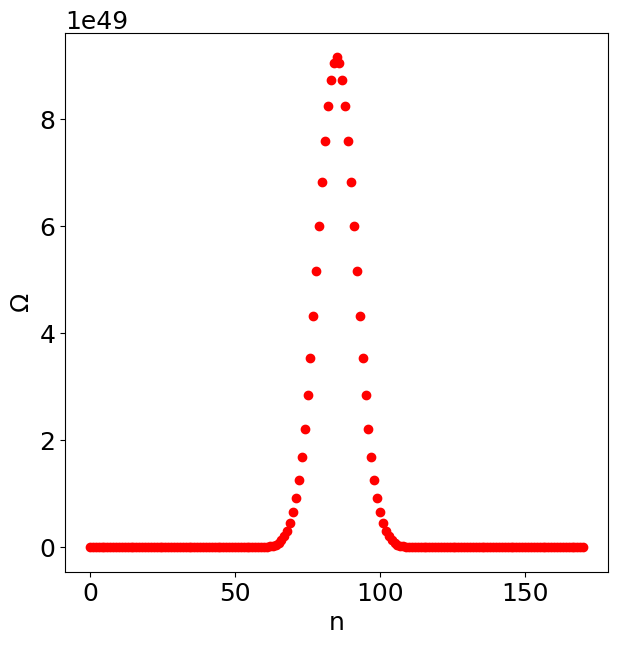

In [21]:
N = 170 #You only need to enter N
n = np.arange(0, N+1, 1) #an array from 0 to N
Omega = factorial(N)/(factorial(n)*factorial(N-n))

plt.plot(n, Omega, 'or')
plt.xlabel('n')
plt.ylabel(r'$\Omega$')
plt.show()

From our inspections above, we could only model a protein with 170 bend points using this method. We can get further if we take the `log`. For example, $\ln \Omega\left(N, n\right)$. However, we still need to make an approximation to deal with the factorials. We're in luck because it turns out that

$$\ln x! \approx x\ln x$$

which allows us to write

$$\ln \Omega\left(N, n\right)\approx N\ln \left(N\right) - n\ln \left(n\right) - \left(N-n\right) \ln \left(N-n\right)$$

Calculate the un-approximated and approximated versions of $\ln \Omega\left(N, n_{max}\right)$, and plot their ratio vs. $N$ to see how good of an approximation it is.

* Create arrays
    * `N = np.arange(1, 170, 2)`
    * `n_max = N/2` 
* Calculate $\ln \Omega\left(N, n_{max}\right) = \frac{N!}{n_{max}!\left(N-n_{max}\right)!}$
* Calculate $\ln \Omega\left(N, n_{max}\right)\approx N\ln \left(N\right) - n_{max}\ln \left(n_{max}\right) - \left(N-n_{max}\right) \ln \left(N-n_{max}\right)$
* Plot `ln_Omega_approx/ln_Omega vs. N`

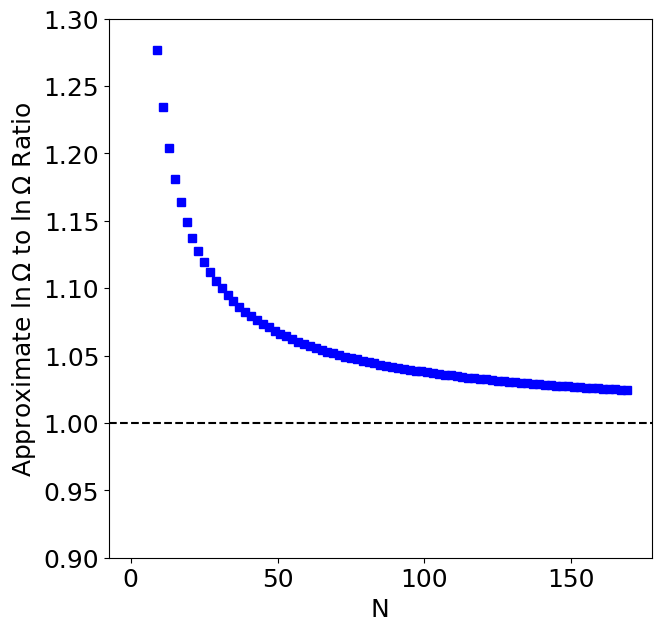

In [26]:
N = np.arange(1,170,2)
n_max = N/2
ln_Omega = np.log(factorial(N)/(factorial(n_max)*factorial(N-n_max)))
ln_Omega_approx = N*np.log(N)-n_max*np.log(n_max)-(N-n_max)*np.log(N-n_max)

plt.plot(N, ln_Omega_approx/ln_Omega, 'sb')
plt.axhline(y=1, color = 'k', linestyle = '--')
plt.xlabel('N')
plt.ylabel(r'Approximate $\ln\Omega$ to $\ln\Omega$ Ratio')
plt.ylim(0.9, 1.3)
plt.show()

**What do you notice about the approximation as $N$ increases?**

## Entropic Energy
It turns out that we define entropy as

$$S=k_B\ln\Omega$$

One can make sense of this by recalling that in the Boltzmann Distribution

$$\Omega \propto e^{-E_i/k_BT}$$

and therefore

$$\ln\Omega \propto \frac{-E_i}{k_BT}$$

and 

$$E_i \propto -k_BT\ln\Omega$$

Thus, we write the energy related to the entropy can be written as

$$E_{entropic} = -T S = -k_BT\ln\Omega$$

Let's take a look at the entropic energy. In the code cell below, plot $TS$ for a system of 200 amino acids ($N=200$), where each of the amino acids could form a bended fold ($0\le n\le 200$). That is, plot the approximated $k_BT\ln\Omega$ vs. $n$. Use $T=310$ K and $k_B=8.62\times 10^{-5}$ eV/K. 

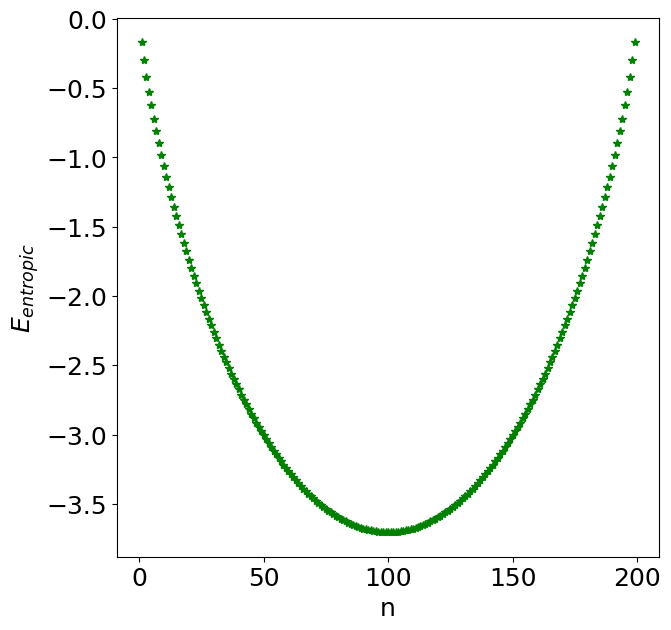

In [35]:
N = 200
n = np.arange(1, N, 1)
kB = 8.62e-5
T = 310
ln_Omega_approx2 = N*np.log(N)-N*np.log(N)-(N)*np.log(N)
E = -kB*T*(N*np.log(N)-n*np.log(n)-(N-n)*np.log(N-n))


plt.plot(n, E, '*g')
plt.xlabel('n')
plt.ylabel(r'$E_{entropic}$')
plt.show()

* **Which folded configuration has the lowest energy?**
* **Is this what you expected?**


# The Gibbs Energy
What we have described above is the energy related to configurations. It's possible that forming a folded bend requires energy  ($+E$) or releases energy ($-E$). For a more complete description, we can write the Gibbs Free Energy.

$$G = H - TS$$

where $H$ is the energy required or released for a bended fold. We will assume four scenarios where the enthalpy is $H=n\epsilon$, where $\epsilon=(0.0 k_BT, 0.5 k_BT, 1.0 k_BT, 2.0 k_BT)$.

* `k_B = 8.62e-5`
* `T = 310`
* `N = 200`
* `n = np.arange(1, N, 1)`
* `H00 = n*0*k_B*T`
* `H05 = n*0.5*k_B*T`
* `H10 = n*1.0*k_B*T`
* `H20 = n*2.0*k_B*T`

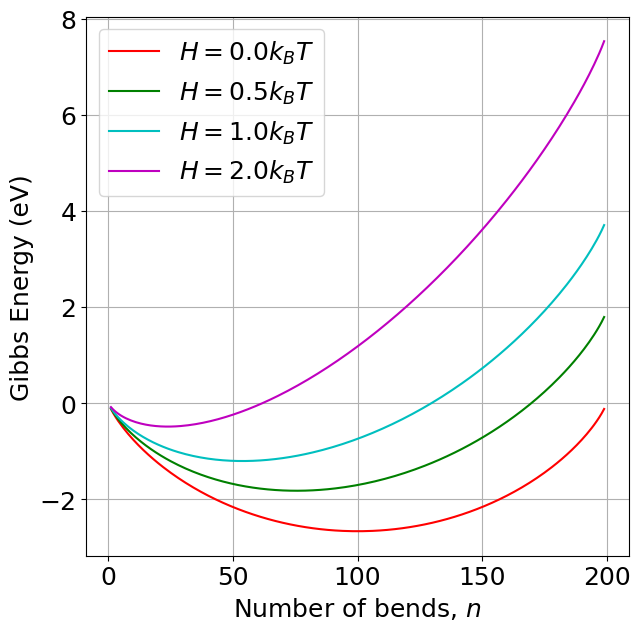

In [46]:
k_B = 6.2e-5
T = 310
N = 200 #total number of amino acids
n = np.arange(1,N,1) #number of hairpin turns 
Entropy = -k_B*T*(N*np.log(N)-n*np.log(n)-(N-n)*np.log(N-n)) #entropy using Stirling in units of kB
S = k_B*(N*np.log(N)-n*np.log(n)-(N-n)*np.log(N-n))

#The enthalpies in units of kBT
H00 = n*0*k_B*T
H05 = n*0.5*k_B*T
H10 = n*1.0*k_B*T
H20 = n*2.0*k_B*T

Gibbs00 = H00-T*S
Gibbs05 = H05-T*S
Gibbs10 = H10-T*S
Gibbs20 = H20-T*S

plt.plot(n, Gibbs00, '-r', label='$H = 0.0 k_BT$')
plt.plot(n, Gibbs05, '-g', label='$H = 0.5 k_BT$')
plt.plot(n, Gibbs10, '-c', label='$H = 1.0 k_BT$')
plt.plot(n, Gibbs20, '-m', label='$H = 2.0 k_BT$')
plt.grid(True)
plt.xlabel('Number of bends, $n$')
plt.ylabel('Gibbs Energy (eV)')
plt.legend(loc=0)
plt.show()

### The minimum energy
Let's look at how many bends are most likely to form (lowest energy structure) for varying enthalpies.
**You only need to shift-enter the next code cell.**

[100, 76, 54, 24]


[]

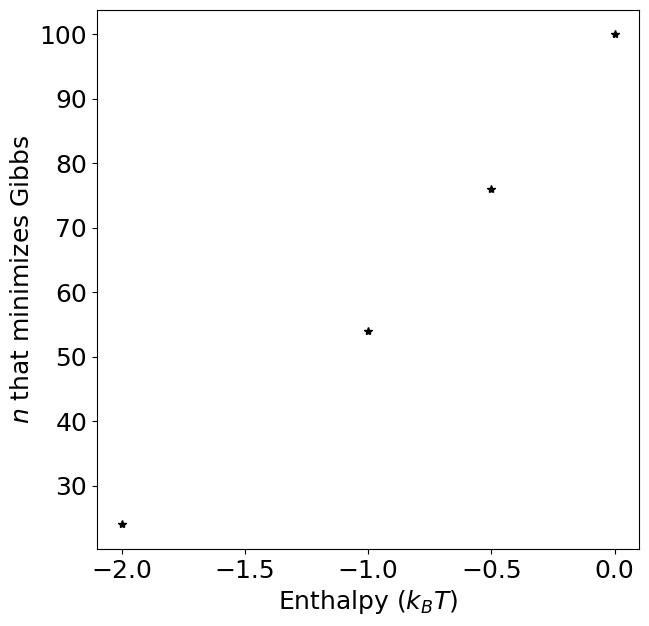

In [47]:
#shift the row by two because of zero counting and starting at 1
Gibbs_mins = ([np.argmin(Gibbs00)+1, np.argmin(Gibbs05)+1, np.argmin(Gibbs10)+1, np.argmin(Gibbs20)+1])
Enthalpy = ([0, -0.5, -1, -2])
print(Gibbs_mins)
plt.plot(Enthalpy, Gibbs_mins, '*k')
plt.xlabel('Enthalpy ($k_BT$)')
plt.ylabel('$n$ that minimizes Gibbs')
plt.plot()

From the graphs above, we see that a positive enthalpy (energy cost for a bend) causes a reduction in the most-likely number of bends (lowest energy structure). The higher the enthalpy, the fewer bends likely.

### What happens when you make the bends release energy?